In [261]:
import pandas as pd

# Reading Dataset

In [262]:
df = pd.read_csv(r"G:\My Drive\Projects\Email Spam Classifier\spam.csv")

In [263]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5612,spam,“Congratulations! You’ve won a $500 gift card ...,NaN,NaN,NaN
5613,spam,"“Hello [Name], your shipment from UPS will arr...",NaN,NaN,NaN
5614,spam,“Your Wells Fargo account has been locked for ...,NaN,NaN,NaN
5615,spam,"“Hey, this is [Name]. I’m in a meeting, but I ...",NaN,NaN,NaN


In [264]:
# Checking Shape of data

df.shape

(5617, 5)

# Data Cleaning

In [265]:
# Checking missing values

df.isna().sum()

v1               0
v2               0
Unnamed: 2    5567
Unnamed: 3    5605
Unnamed: 4    5611
dtype: int64

In [266]:
# Our dataset has 5572 rows and 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' columns have a high number of null values
# which is almost equal to the total number of rows. So I will drop them

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [267]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [268]:
# Renaming v1 and v2 columns as 'target' and 'text'

df = df.rename(columns = {'v1':'target','v2':'text'})

In [269]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [270]:
# Applying label encoding on target columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [271]:
df['target'] = encoder.fit_transform(df['target'])

In [272]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [273]:
# ⬆️ Assigned 1 to spam and 0 to ham 

In [274]:
# checking for duplicate values

df.duplicated().sum()

403

In [275]:
# Dropping duplicates rows

df = df.drop_duplicates()

In [276]:
# Cross checking for duplicate values

df.duplicated().sum()

0

In [277]:
# Reseting index and checking the shape of data after dropping duplicated rows

df = df.reset_index(drop=True)

df.shape

(5214, 2)

# Exploratory Data Analysis

In [278]:
df['target'].value_counts()

0    4516
1     698
Name: target, dtype: int64

In [279]:
import matplotlib.pyplot as plt

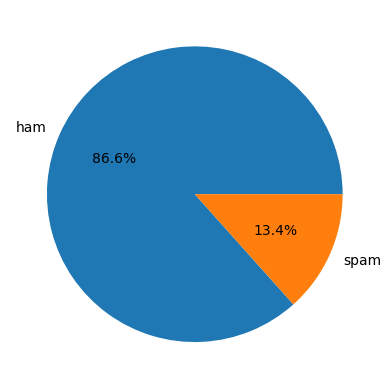

In [280]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

In [281]:
# Data is not normally distributed in 'target' column

In [282]:
# Getting number of characters in each text

df['characters'] = df['text'].apply(len)

In [283]:
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [284]:
import nltk

In [285]:
# Getting number of words in each text

df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [286]:
df.head()

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [287]:
# Getting number of sentences in each text

df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [288]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [289]:
df[['characters','words','sentences']].dtypes

characters    int64
words         int64
sentences     int64
dtype: object

# Drawing some insights from five-point summary

In [290]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5214.000000,5214.000000,5214.000000
mean,79.316264,18.519563,1.969122
std,58.205734,13.311807,1.444811
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [291]:
#ham

df[df['target']==0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [292]:
#spam

df[df['target']==1][['characters','words','sentences']].describe()

,characters,words,sentences
count,698.000000,698.000000,698.000000
mean,136.620344,27.550143,2.932665
std,31.098409,7.178873,1.462018
min,13.000000,2.000000,1.000000
25%,128.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,48.000000,9.000000


In [293]:
# By comparing mean and median of 'characters','words','sentences' columns for ham and spam separately
# we can say that the spam messages are usually long

In [294]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

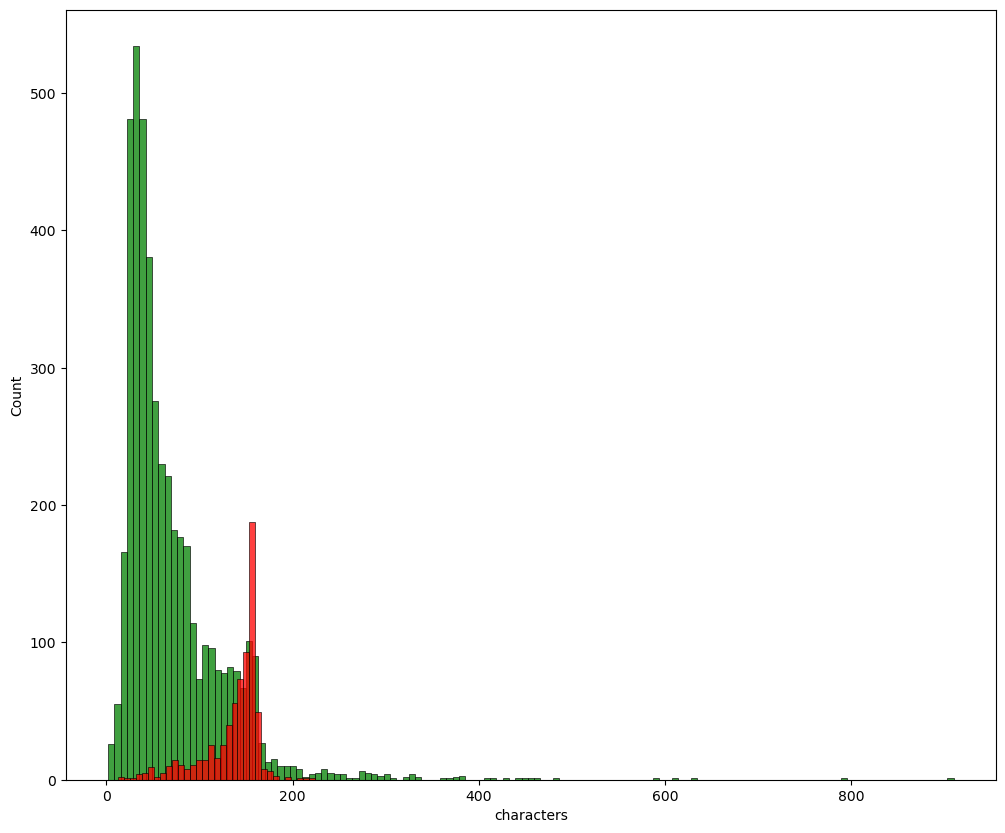

In [295]:
# for characters

plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['characters'],color='green')
sns.histplot(df[df['target']==1]['characters'],color='red')

<Axes: xlabel='words', ylabel='Count'>

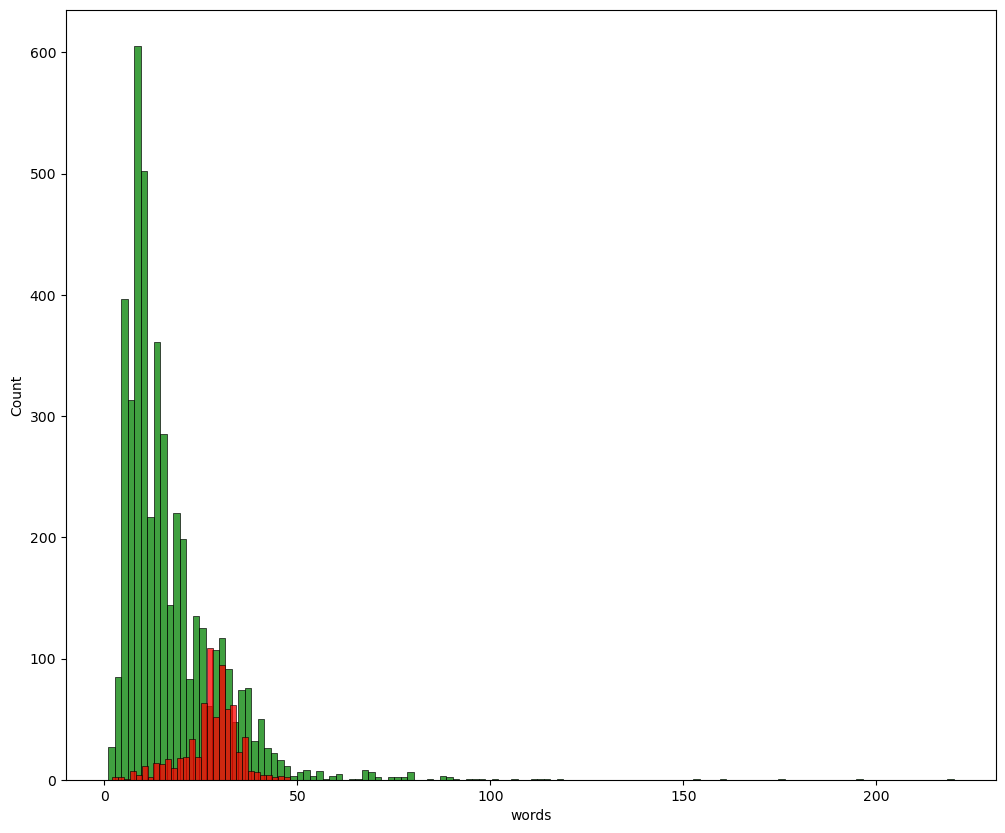

In [296]:
# for words

plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['words'],color='green')
sns.histplot(df[df['target']==1]['words'],color='red')

# Removing Multicollinearity

C:\Users\aktwe\AppData\Local\Temp\ipykernel_15564\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

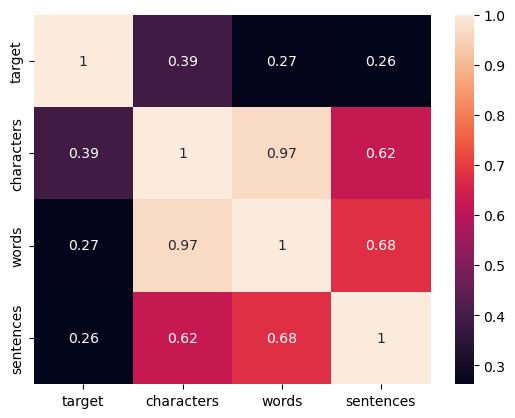

In [297]:
sns.heatmap(df.corr(),annot=True)

In [298]:
# Need to keep only one column because of high multicollinearity. I will keep only characters.

df = df.drop(['words','sentences'],axis=1)

In [299]:
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Steming

In [300]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [301]:
# Defining a function which will lower the case, tokenize, remove special characters, stop words, and punctuation and apply steming on the text

def preprocess_text(text):
    
    # Converting into lower-case
    lower_converted = text.lower()

    # Getting a list of words
    list_of_words = nltk.word_tokenize(lower_converted)

    # Getting onlyn alphanumeric text
    only_alpha_numeric_words = []
    for i in list_of_words:
        if i.isalnum():
            only_alpha_numeric_words.append(i)

    # Removing Stopwords and puctuation marks
    cleaned_text = []
    for i in only_alpha_numeric_words:
        if i not in stopwords.words('english') and i not in string.punctuation:
            cleaned_text.append(i) 
               
    # Applying stemming
    final_text = []
    for i in cleaned_text:
        final_text.append(ps.stem(i))

    # Returning final text
    return " ".join(final_text)
    

In [302]:
# Creating a column with all changes

df['final_text'] = df['text'].apply(preprocess_text)

In [303]:
df.head()

,target,text,characters,final_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


# Generating word cloud

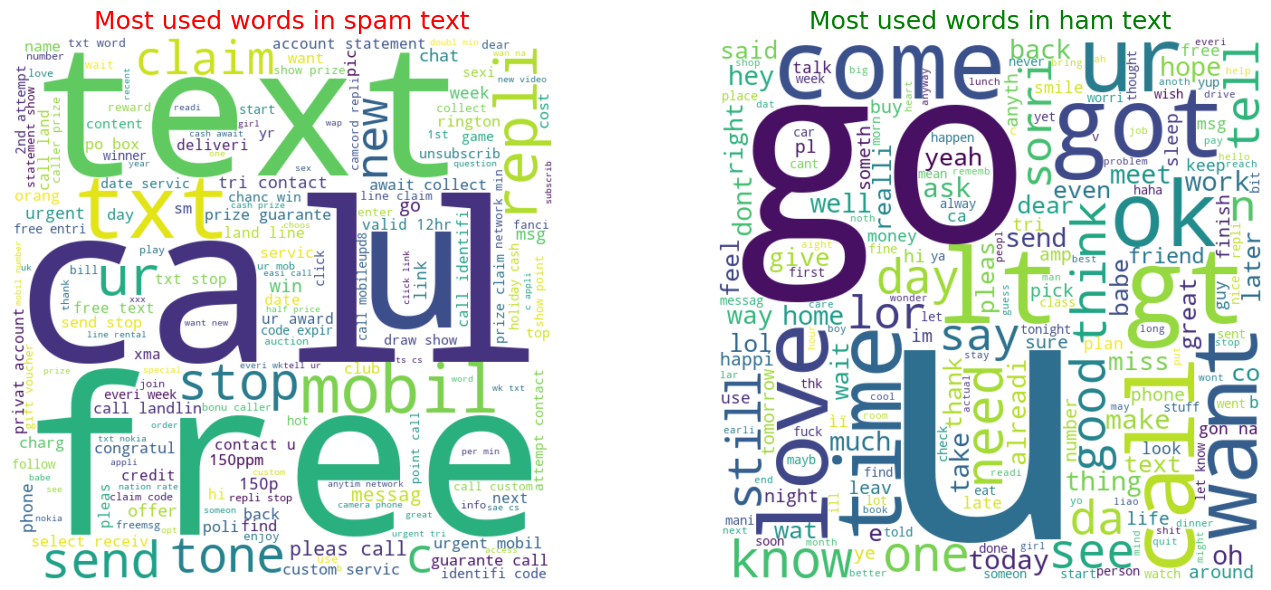

In [304]:
from wordcloud import WordCloud
wc = WordCloud(width = 600,height = 600,min_font_size = 10,background_color = 'white')

# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Creating the first word cloud (Spam)
spam_wc = wc.generate(df[df['target']==1]['final_text'].str.cat(sep=" "))
axes[0].imshow(spam_wc, interpolation='bilinear')
axes[0].set_title('Most used words in spam text', fontsize=18, color='red')
axes[0].axis('off')

# Creating the second word cloud (Ham)
ham_wc = wc.generate(df[df['target']==0]['final_text'].str.cat(sep=" "))
axes[1].imshow(ham_wc, interpolation='bilinear')
axes[1].set_title('Most used words in ham text', fontsize=18, color='green')
axes[1].axis('off')

plt.tight_layout()

plt.show()

# Getting top 30 words used in spam and ham text

In [305]:
from collections import Counter

In [306]:
spam_words = []
for i in df[df['target']==1]['final_text'].tolist():
    for j in i.split():
        spam_words.append(j)  

most_common_spam_30_df = pd.DataFrame(Counter(spam_words).most_common(30))

ham_words = []
for i in df[df['target']==0]['final_text'].tolist():
    for j in i.split():
        ham_words.append(j)  

most_common_ham_30_df = pd.DataFrame(Counter(ham_words).most_common(30))

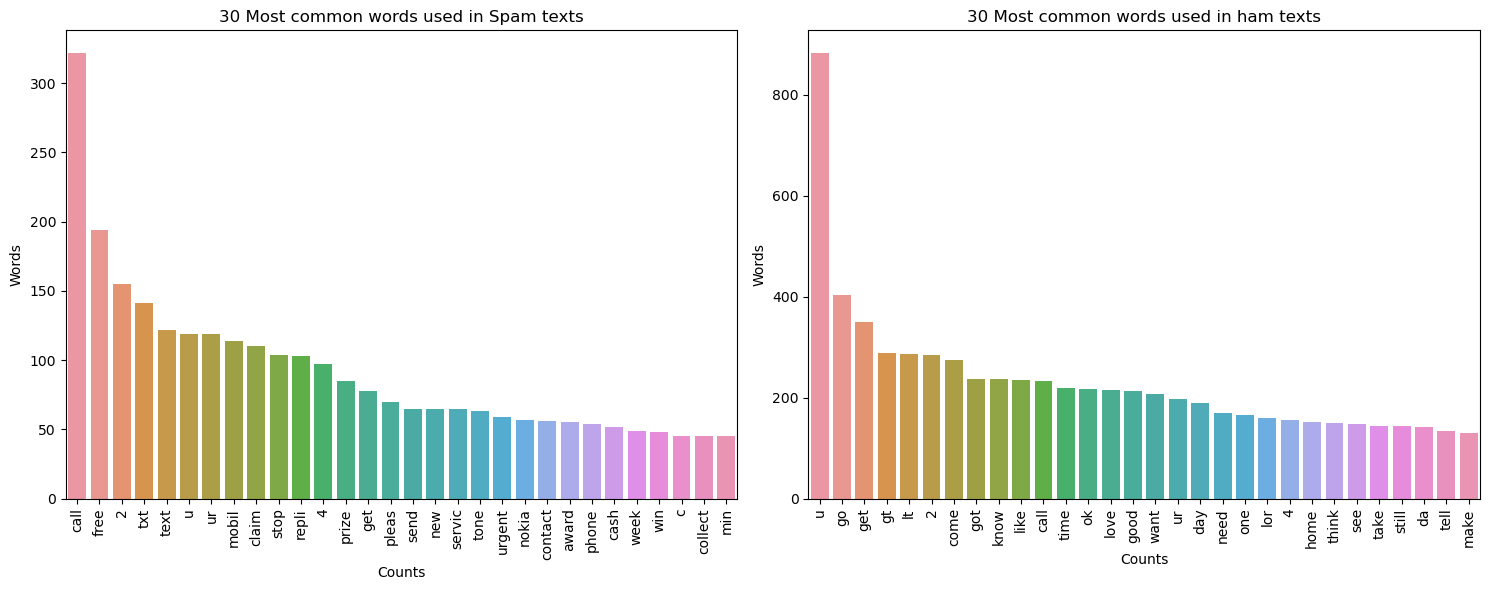

In [307]:
# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Creating the first bar plot (Spam)
sns.barplot(x=0, y=1, data=most_common_spam_30_df, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')
axes[0].set_xlabel('Counts')
axes[0].set_ylabel('Words')
axes[0].set_title('30 Most common words used in Spam texts')


# Creating the second bar plot (ham)
sns.barplot(x=0, y=1, data=most_common_ham_30_df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')
axes[1].set_xlabel('Counts')
axes[1].set_ylabel('Words')
axes[1].set_title('30 Most common words used in ham texts')

plt.tight_layout()

plt.show()

# Model Building (Naive Bayes Classifier)

In [308]:
# I am using Naive Bayes Classifier - GaussianNB, MultinomialNB, BernoulliNB and will choose one with the highest precision score for this model 
# and for converting text to vectors I will check for Bag of words (count vectorizer) and tfidf vectorizer techniques.
# I will choose one with the highest precision_score.

In [309]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

from  sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [310]:
y = df['target'].values
y

array([0, 0, 1, ..., 1, 1, 1])

### Count Vectorizer

In [311]:
x_cv = cv.fit_transform(df['final_text']).toarray()

In [312]:
x_train,x_test,y_train,y_test = train_test_split(x_cv,y,test_size=0.3,random_state=42)

In [313]:
print("GaussianNB Evaluation Metrics: - ")
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print("Accuracy Score = ",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix: - ")
print(confusion_matrix(y_test,y_pred_gnb))
print("Precision Score: - ",precision_score(y_test,y_pred_gnb))

GaussianNB Evaluation Metrics: - 
Accuracy Score =  0.8670926517571885
Confusion Matrix: - 
[[1164  184]
 [  24  193]]
Precision Score: -  0.5119363395225465


In [314]:
print("MultinomialNB Evaluation Metrics: - ")
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print("Accuracy Score = ",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix: - ")
print(confusion_matrix(y_test,y_pred_mnb))
print("Precision Score: - ",precision_score(y_test,y_pred_mnb))

MultinomialNB Evaluation Metrics: - 
Accuracy Score =  0.9750798722044729
Confusion Matrix: - 
[[1322   26]
 [  13  204]]
Precision Score: -  0.8869565217391304


In [315]:
print("BernoulliNB Evaluation Metrics: - ")
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
print("Accuracy Score = ",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix: - ")
print(confusion_matrix(y_test,y_pred_bnb))
print("Precision Score: - ",precision_score(y_test,y_pred_bnb))

BernoulliNB Evaluation Metrics: - 
Accuracy Score =  0.9642172523961662
Confusion Matrix: - 
[[1340    8]
 [  48  169]]
Precision Score: -  0.9548022598870056


### Tfidf Vectorizer

In [316]:
x_tfidf = tfidf.fit_transform(df['final_text']).toarray()

In [317]:
x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.3,random_state=42)

In [318]:
print("GaussianNB Evaluation Metrics: - ")
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print("Accuracy Score = ",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix: - ")
print(confusion_matrix(y_test,y_pred_gnb))
print("Precision Score: - ",precision_score(y_test,y_pred_gnb))

GaussianNB Evaluation Metrics: - 
Accuracy Score =  0.85814696485623
Confusion Matrix: - 
[[1157  191]
 [  31  186]]
Precision Score: -  0.493368700265252


In [319]:
print("MultinomialNB Evaluation Metrics: - ")
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print("Accuracy Score = ",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix: - ")
print(confusion_matrix(y_test,y_pred_mnb))
print("Precision Score: - ",precision_score(y_test,y_pred_mnb))

MultinomialNB Evaluation Metrics: - 
Accuracy Score =  0.9731629392971246
Confusion Matrix: - 
[[1348    0]
 [  42  175]]
Precision Score: -  1.0


In [320]:
print("BernoulliNB Evaluation Metrics: - ")
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
print("Accuracy Score = ",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix: - ")
print(confusion_matrix(y_test,y_pred_bnb))
print("Precision Score: - ",precision_score(y_test,y_pred_bnb))

BernoulliNB Evaluation Metrics: - 
Accuracy Score =  0.9718849840255591
Confusion Matrix: - 
[[1338   10]
 [  34  183]]
Precision Score: -  0.9481865284974094


In [321]:
# I get highest precision score in Tfidf Vectorization technique and in Multinomial Naive Bayes. I will build my model with this combination.

In [322]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))